<a href="https://colab.research.google.com/github/myDSMLProjects/Deep-Learning/blob/master/ConvNNHorsesand_Humans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-06-14 09:58:03--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 2404:6800:4008:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  69.7MB/s    in 2.0s    

2020-06-14 09:58:05 (69.7 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2020-06-14 09:58:08--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 2404:6800:4008:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  28.5MB/s    in 0.4s    

2020-06-14 09:58:09 (28.5 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [0]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')

local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')

In [0]:
# Lets define the directories

In [0]:
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [0]:
# Lets see what the filename does look like

In [8]:
train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)

validation_horse_names = os.listdir(validation_horse_dir)
validation_human_names = os.listdir(validation_human_dir)

print(train_horse_names[:10])
print(train_human_names[:10])

print(validation_horse_names[:10])
print(validation_human_names[:10])



['horse36-3.png', 'horse03-8.png', 'horse06-2.png', 'horse20-2.png', 'horse04-0.png', 'horse13-3.png', 'horse29-0.png', 'horse11-5.png', 'horse03-2.png', 'horse47-2.png']
['human05-02.png', 'human14-16.png', 'human05-14.png', 'human09-02.png', 'human06-11.png', 'human08-05.png', 'human08-14.png', 'human16-03.png', 'human11-21.png', 'human15-26.png']
['horse2-441.png', 'horse5-458.png', 'horse5-303.png', 'horse6-403.png', 'horse4-232.png', 'horse5-103.png', 'horse6-345.png', 'horse4-556.png', 'horse3-011.png', 'horse5-478.png']
['valhuman03-21.png', 'valhuman01-16.png', 'valhuman04-00.png', 'valhuman02-08.png', 'valhuman05-06.png', 'valhuman05-21.png', 'valhuman03-19.png', 'valhuman01-15.png', 'valhuman04-22.png', 'valhuman03-08.png']


In [9]:
print('Total training horse images : ', len(train_horse_names))
print('Total training human images : ', len(train_human_names))

print('Total validation horse images : ', len(validation_horse_names))
print('Total validation human images : ', len(validation_human_names))


Total training horse images :  500
Total training human images :  527
Total validation horse images :  128
Total validation human images :  128


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Parameters for our graph
nrows=4
ncols=4

#index for iterating over images
pic_index=0

In [0]:
# Now display the batch of 8 horses and human pictures .

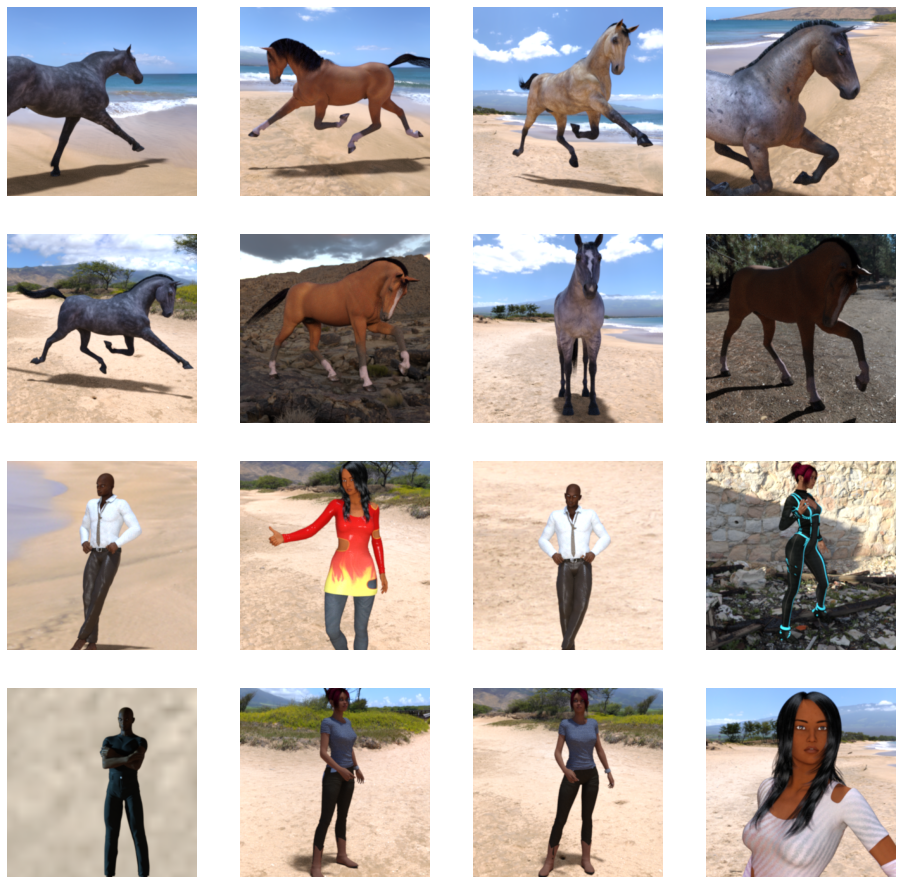

In [12]:
# setup matplotlib fig and size it to fit 4x4 pics

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  #setup a subplot indices starts at 1
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [0]:
# Building the model from scratch

In [0]:
import tensorflow as tf

In [0]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300,3)),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

**Lets set up data generators tht will read pictures in our source folders, convert them with labels to pur network. we'll have on egenerator for the training set and one for the validation set.our generators will yield batches of images of size 300 by 300 and their labels(binary)**

In [0]:
# data that goes to the neural netowork has to be neutralized.this  is done using rescale parameter

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    '/tmp/horse-or-human/',
    target_size=(300,300),
    batch_size=128,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    '/tmp/validation-horse-or-human/',
    target_size=(300,300),
    class_mode='binary',
    batch_size=32)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [20]:
history = model.fit(train_generator,
                    steps_per_epoch=8,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator,
                    validation_steps=8)

Epoch 1/15
8/8 [==============================] - 8s 960ms/step - loss: 0.9853 - accuracy: 0.5028 - val_loss: 0.6602 - val_accuracy: 0.5039
Epoch 2/15
8/8 [==============================] - 8s 957ms/step - loss: 0.6042 - accuracy: 0.6552 - val_loss: 0.8956 - val_accuracy: 0.8281
Epoch 3/15
8/8 [==============================] - 8s 962ms/step - loss: 0.5165 - accuracy: 0.7620 - val_loss: 0.6044 - val_accuracy: 0.8750
Epoch 4/15
8/8 [==============================] - 8s 957ms/step - loss: 0.2757 - accuracy: 0.8899 - val_loss: 1.9112 - val_accuracy: 0.8008
Epoch 5/15
8/8 [==============================] - 8s 951ms/step - loss: 0.8471 - accuracy: 0.7864 - val_loss: 0.5874 - val_accuracy: 0.8594
Epoch 6/15
8/8 [==============================] - 8s 960ms/step - loss: 0.5878 - accuracy: 0.8176 - val_loss: 0.7523 - val_accuracy: 0.8555
Epoch 7/15
8/8 [==============================] - 8s 958ms/step - loss: 0.1989 - accuracy: 0.9344 - val_loss: 1.0509 - val_accuracy: 0.8359
Epoch 8/15
8/8 [====

In [22]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/' +fn
  img = image.load_img(path, target_size=(300,300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])

  if classes[0]>0.5:
    print(fn + 'is a human')
  else:
    print(fn +'is a horse')

Saving horses-1414889_640.jpg to horses-1414889_640.jpg
[1.]
horses-1414889_640.jpgis a human


To get a feel of ehat kind of features our convnet has learnd one fun to do is to visualize how as input gets transformed as it goes through the convnet

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


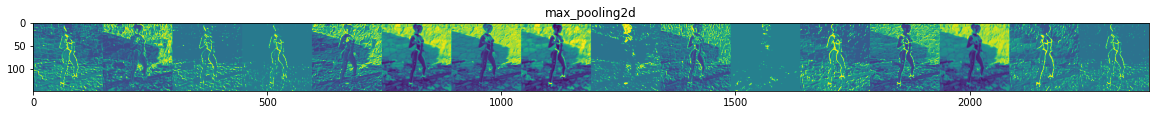

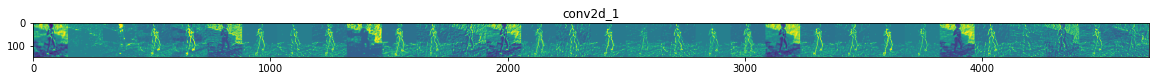

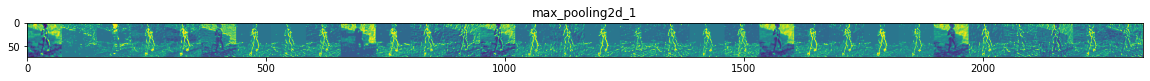

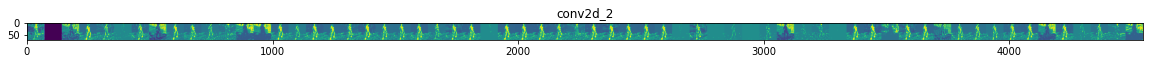

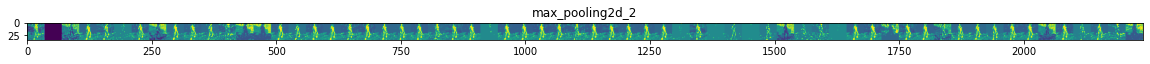

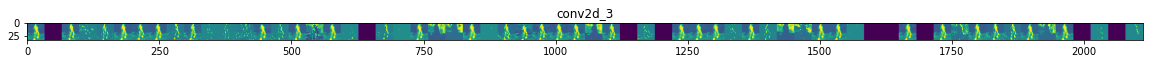

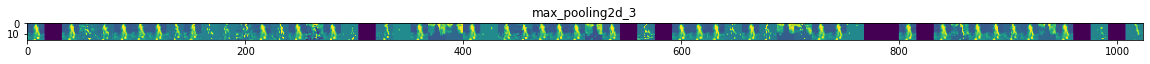

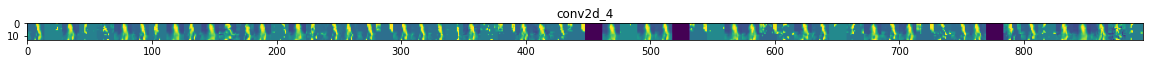

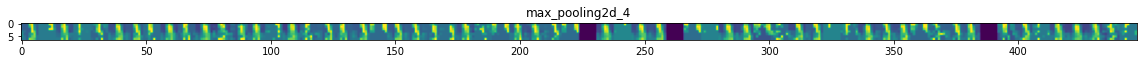

In [23]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Lets define a new model thar\t will take an image as input and will output intermediate representations for all the layers in the previous model after the first
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Lets prepare a random input image from the training set
horse_img_files = [os.path.join(train_horse_dir, fn) for fn in train_horse_names]
human_img_files = [os.path.join(train_human_dir, fn) for fn in train_human_names]

img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300,300)) # this is a PIL img
x = img_to_array(img) # numpy array with shape(150,150,3)
x = x.reshape((1,)+x.shape) # numpy array with shape(1,150,150,3)

x /= 255

successive_feature_maps = visualization_model.predict(x)
layer_names = [layer.name for layer in model.layers[1:]]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # just to do this for convnet and fc layers
    n_features = feature_map.shape[-1]
    size = feature_map.shape[1]

    display_grid = np.zeros((size, size*n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean() 
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
